In [35]:
import pandas as pd
data  = pd.read_csv('NCHS.csv')

In [36]:
print(data.head())


   Year                                     113 Cause Name  \
0  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
1  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
2  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
3  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
4  2017  Accidents (unintentional injuries) (V01-X59,Y8...   

               Cause Name          State  Deaths  Age-adjusted Death Rate  
0  Unintentional injuries  United States  169936                     49.4  
1  Unintentional injuries        Alabama    2703                     53.8  
2  Unintentional injuries         Alaska     436                     63.7  
3  Unintentional injuries        Arizona    4184                     56.2  
4  Unintentional injuries       Arkansas    1625                     51.8  


In [37]:
data.columns

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')

In [38]:
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [39]:
data.shape

(10868, 6)

In [41]:
data = data.dropna()
data.shape

(10868, 6)

In [42]:
#Approximately 10868 death cases were recorded in different U.s. states
#what are the causes of deaths in united states?
causes = data['Cause Name'].unique()
causes

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Stroke', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Suicide', 'Cancer', 'Kidney disease'],
      dtype=object)

In [43]:
#drop all causes
data = data[data['Cause Name']!='All causes']
causes = data['Cause Name'].unique()
causes

array(['Unintentional injuries', "Alzheimer's disease", 'Stroke', 'CLRD',
       'Diabetes', 'Heart disease', 'Influenza and pneumonia', 'Suicide',
       'Cancer', 'Kidney disease'], dtype=object)

In [20]:
len(causes)

10

In [44]:
#unique states in the study
state = data['State'].unique()
state

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [23]:
len(state)

52

In [45]:
data1 = data[data['State']!='United States']
state = data1['State'].unique()
state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [46]:
len(state)

51

In [48]:
#Total number of deaths in the united states from 1999 to 2017
data['Deaths'].sum()


72561166

In [49]:
dyear = data.groupby(['Year']).sum()
dyear

,Deaths,Age-adjusted Death Rate
Year,,
1999,3811652,36290.4
2000,3804388,35849.3
2001,3798716,35256.0
2002,3837746,35101.3
2003,3824230,34504.9
2004,3728266,33029.7
2005,3779962,32947.6
2006,3709352,31757.6
2007,3692602,31046.7


<AxesSubplot:title={'center':'Death per year\n 1999-2015'}, xlabel='Year'>

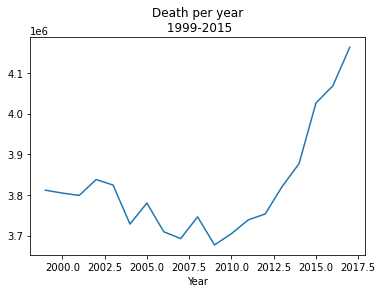

In [50]:
dyear['Deaths'].plot(title='Death per year\n 1999-2015')

In [61]:
#Data visulation
data1 = data[data['State'] != 'United States']
data2 = data1.groupby('State').sum()
data2.sort_values('Deaths',ascending=False,inplace=True)
data2.head(10)



,Year,Deaths,Age-adjusted Death Rate
State,,,
California,381520,3594261,10378.3
Florida,381520,2533472,10434.4
Texas,381520,2367695,11506.8
New York,381520,2264120,10519.1
Pennsylvania,381520,1854953,11643.4
Ohio,381520,1605250,12356.6
Illinois,381520,1508039,11376.9
Michigan,381520,1313813,12061.7
North Carolina,381520,1115953,11976.7


<AxesSubplot:title={'center':'Top ten states with death number \n 1999-2015'}, xlabel='State'>

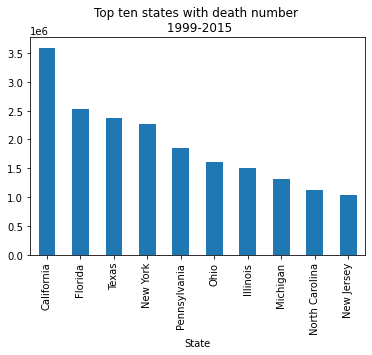

In [62]:
data2['Deaths'].head(10).plot.bar(title="Top ten states with death number \n 1999-2015")


In [64]:
dataset1 = data[data['Cause Name']!='All Causes']
dataset2 = data.groupby('Cause Name').sum()
dataset2.sort_values("Deaths",ascending=False,inplace=True)
dataset2.head(10)

,Year,Deaths,Age-adjusted Death Rate
Cause Name,,,
Heart disease,1983904,24445280,195626.9
Cancer,1983904,21687288,176443.1
Stroke,1983904,5453046,45337.9
CLRD,1983904,5189854,44061.7
Unintentional injuries,1983904,4695640,42890.9
Alzheimer's disease,1983904,2989632,24710.1
Diabetes,1983904,2799886,23112.8
Influenza and pneumonia,1983904,2189282,17986.3
Kidney disease,1983904,1717226,13900.1


<AxesSubplot:title={'center':'Top ten causes in USA \n 1999-2017'}, xlabel='Cause Name'>

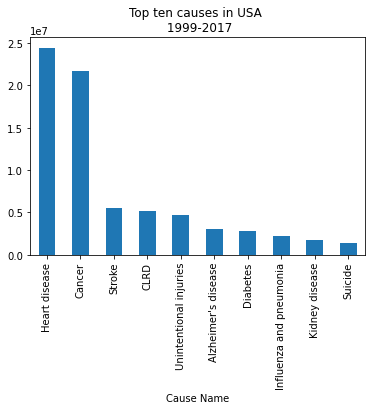

In [65]:
dataset2['Deaths'].head(10).plot.bar(title = "Top ten causes in USA \n 1999-2017")